# 실습[04] 심층신경망 훈련
## 휴먼지능정보공학과 201910805 백서희

In [ ]:
#학습된 파라미터 저장
#netname='./my_net01.pkl'
#torch.save(model, netname,)

#저장된 파라미터 로드
#netname=',/my_net01.pkl'
#model=torch.load(netname)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt

from torch.optim import lr_scheduler

batch_size=16
learning_rate=0.002
num_epoch=3

In [2]:
cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
#data augmentation시 사용
#cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.Compose([transforms.Scale(36),transforms.CenterCrop(32),transforms.RandomHorizontalFlip(),transforms.Lambda(lambda x:x.rotate(90)),transforms.ToTensor()]))
cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

#data normalization시 사용
#cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,0.5,0.5),std(0.5,0.5,0.5)),]),target_transform=None, download=False)
#cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,0.5,0.5),std(0.5,0.5,0.5)),]),target_transform=None, download=False)


Files already downloaded and verified
Files already downloaded and verified


cifar_train 길이: 50000
cifar_test 길이: 10000
image data 형태: torch.Size([3, 32, 32])
label: 9


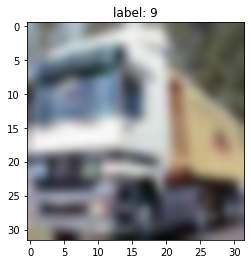

In [3]:
print("cifar_train 길이:",len(cifar_train))
print("cifar_test 길이:",len(cifar_test))

image, label=cifar_train.__getitem__(1)
print("image data 형태:", image.size())
print("label:",label)

img=image.numpy()

r,g,b=img[0,:,:],img[1,:,:],img[2,:,:]
img2=np.zeros((img.shape[1],img.shape[2],img.shape[0]))
img2[:,:,0],img2[:,:,1],img2[:,:,2]=r,g,b

plt.title("label: %d" %label)
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [4]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j,[imgs, labels] in enumerate(dloader):
        img=Variable(imgs, volatile=True)#.cuda()
        label=Variable(labels)#.cuda()
        
        output=imodel.forward(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}" .format(100*correct/total))

In [5]:
train_loader=torch.utils.data.DataLoader(list(cifar_train)[:], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            #nn.Dropout2d(0,2),
            #nn.BatchNorm2d(16),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            #nn.Dropout2d(0,2),
            #nn.BatchNorm2d(32),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            #nn.Dropout2d(0,2),
            #nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*8*8, 100),
            nn.ReLU(),
            #nn.Dropout2d(0,2),
            #nn.BatchNorm1d(100), #batch nomalization
            nn.Linear(100,10)
        )
        
        #weight initialization
        #for m in self.modules():
            #if isinstance(m, nn.Conv2d):
                #init.kaiming_normal(m.weight.data)
                #m.bias.data.fill_(0)
            #if isinstance(m, nn.Linear):
                #init.kaiming_normal(m.weight.data)
                #m.bias.data.fill_(0)
    
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        
        return out
model=CNN()#.cuda()

In [7]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
#adam optimizer
#optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

#learning rate decay
#scheduler=lr_scheduler.stepLR(optimizer, step_size=20, gamma=0.2)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j%1000==0:
            print(j,loss)

0 tensor(2.3042, grad_fn=<NllLossBackward>)
1000 tensor(2.3156, grad_fn=<NllLossBackward>)
2000 tensor(2.2915, grad_fn=<NllLossBackward>)
3000 tensor(2.2838, grad_fn=<NllLossBackward>)
0 tensor(2.2877, grad_fn=<NllLossBackward>)
1000 tensor(2.1250, grad_fn=<NllLossBackward>)
2000 tensor(2.0917, grad_fn=<NllLossBackward>)
3000 tensor(2.1029, grad_fn=<NllLossBackward>)
0 tensor(2.0948, grad_fn=<NllLossBackward>)
1000 tensor(1.6474, grad_fn=<NllLossBackward>)
2000 tensor(1.8728, grad_fn=<NllLossBackward>)
3000 tensor(1.3795, grad_fn=<NllLossBackward>)


In [8]:
ComputeAccr(test_loader, model)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Accuracy of Test Data: 35.58000183105469


# 1. dropout

In [ ]:
cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [ ]:
print("cifar_train 길이:",len(cifar_train))
print("cifar_test 길이:",len(cifar_test))

image, label=cifar_train.__getitem__(1)
print("image data 형태:", image.size())
print("label:",label)

img=image.numpy()

r,g,b=img[0,:,:],img[1,:,:],img[2,:,:]
img2=np.zeros((img.shape[1],img.shape[2],img.shape[0]))
img2[:,:,0],img2[:,:,1],img2[:,:,2]=r,g,b

plt.title("label: %d" %label)
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [ ]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j,[imgs, labels] in enumerate(dloader):
        img=Variable(imgs, volatile=True)#.cuda()
        label=Variable(labels)#.cuda()
        
        output=imodel.forward(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}" .format(100*correct/total))

In [ ]:
train_loader=torch.utils.data.DataLoader(list(cifar_train)[:], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.Dropout2d(0,2),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.Dropout2d(0,2),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.Dropout2d(0,2),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*8*8, 100),
            nn.ReLU(),
            nn.Dropout2d(0,2),
            nn.Linear(100,10)
        )
        
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        
        return out
model=CNN()#.cuda()

In [ ]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j%1000==0:
            print(j,loss)

In [ ]:
ComputeAccr(test_loader, model)

# 2. Data Augmentation

In [ ]:
cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.Compose([transforms.Scale(36),transforms.CenterCrop(32),transforms.RandomHorizontalFlip(),transforms.Lambda(lambda x:x.rotate(90)),transforms.ToTensor()]))
cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [ ]:
print("cifar_train 길이:",len(cifar_train))
print("cifar_test 길이:",len(cifar_test))

image, label=cifar_train.__getitem__(1)
print("image data 형태:", image.size())
print("label:",label)

img=image.numpy()

r,g,b=img[0,:,:],img[1,:,:],img[2,:,:]
img2=np.zeros((img.shape[1],img.shape[2],img.shape[0]))
img2[:,:,0],img2[:,:,1],img2[:,:,2]=r,g,b

plt.title("label: %d" %label)
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [ ]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j,[imgs, labels] in enumerate(dloader):
        img=Variable(imgs, volatile=True)#.cuda()
        label=Variable(labels)#.cuda()
        
        output=imodel.forward(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}" .format(100*correct/total))

In [ ]:
train_loader=torch.utils.data.DataLoader(list(cifar_train)[:], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*8*8, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
    
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        
        return out
model=CNN()#.cuda()

In [ ]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j%1000==0:
            print(j,loss)

In [ ]:
ComputeAccr(test_loader, model)

# 3. weight initialization

In [ ]:
cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [ ]:
print("cifar_train 길이:",len(cifar_train))
print("cifar_test 길이:",len(cifar_test))

image, label=cifar_train.__getitem__(1)
print("image data 형태:", image.size())
print("label:",label)

img=image.numpy()

r,g,b=img[0,:,:],img[1,:,:],img[2,:,:]
img2=np.zeros((img.shape[1],img.shape[2],img.shape[0]))
img2[:,:,0],img2[:,:,1],img2[:,:,2]=r,g,b

plt.title("label: %d" %label)
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [ ]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j,[imgs, labels] in enumerate(dloader):
        img=Variable(imgs, volatile=True)#.cuda()
        label=Variable(labels)#.cuda()
        
        output=imodel.forward(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}" .format(100*correct/total))

In [ ]:
train_loader=torch.utils.data.DataLoader(list(cifar_train)[:], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*8*8, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
        
        #weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal(m.weight.data)
                m.bias.data.fill_(0)
            if isinstance(m, nn.Linear):
                init.kaiming_normal(m.weight.data)
                m.bias.data.fill_(0)
    
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        
        return out
model=CNN()#.cuda()

In [ ]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j%1000==0:
            print(j,loss)

In [ ]:
ComputeAccr(test_loader, model)

# 4. Data Normalization

In [ ]:
#data normalization시 사용
cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,0.5,0.5),std(0.5,0.5,0.5)),]),target_transform=None, download=False)
cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,0.5,0.5),std(0.5,0.5,0.5)),]),target_transform=None, download=False)

In [ ]:
print("cifar_train 길이:",len(cifar_train))
print("cifar_test 길이:",len(cifar_test))

image, label=cifar_train.__getitem__(1)
print("image data 형태:", image.size())
print("label:",label)

img=image.numpy()

r,g,b=img[0,:,:],img[1,:,:],img[2,:,:]
img2=np.zeros((img.shape[1],img.shape[2],img.shape[0]))
img2[:,:,0],img2[:,:,1],img2[:,:,2]=r,g,b

plt.title("label: %d" %label)
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [ ]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j,[imgs, labels] in enumerate(dloader):
        img=Variable(imgs, volatile=True)#.cuda()
        label=Variable(labels)#.cuda()
        
        output=imodel.forward(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}" .format(100*correct/total))

In [ ]:
train_loader=torch.utils.data.DataLoader(list(cifar_train)[:], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*8*8, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
    
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        
        return out
model=CNN()#.cuda()

In [ ]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j%1000==0:
            print(j,loss)

In [ ]:
ComputeAccr(test_loader, model)

# 5. Batch normalization

In [ ]:
cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [ ]:
print("cifar_train 길이:",len(cifar_train))
print("cifar_test 길이:",len(cifar_test))

image, label=cifar_train.__getitem__(1)
print("image data 형태:", image.size())
print("label:",label)

img=image.numpy()

r,g,b=img[0,:,:],img[1,:,:],img[2,:,:]
img2=np.zeros((img.shape[1],img.shape[2],img.shape[0]))
img2[:,:,0],img2[:,:,1],img2[:,:,2]=r,g,b

plt.title("label: %d" %label)
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [ ]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j,[imgs, labels] in enumerate(dloader):
        img=Variable(imgs, volatile=True)#.cuda()
        label=Variable(labels)#.cuda()
        
        output=imodel.forward(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}" .format(100*correct/total))

In [ ]:
train_loader=torch.utils.data.DataLoader(list(cifar_train)[:], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*8*8, 100),
            nn.ReLU(),
            nn.BatchNorm1d(100), #batch nomalization
            nn.Linear(100,10)
        )
 
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        
        return out
model=CNN()#.cuda()

In [ ]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j%1000==0:
            print(j,loss)

In [ ]:
ComputeAccr(test_loader, model)

# 6. Adam optimizer

In [ ]:
cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [ ]:
print("cifar_train 길이:",len(cifar_train))
print("cifar_test 길이:",len(cifar_test))

image, label=cifar_train.__getitem__(1)
print("image data 형태:", image.size())
print("label:",label)

img=image.numpy()

r,g,b=img[0,:,:],img[1,:,:],img[2,:,:]
img2=np.zeros((img.shape[1],img.shape[2],img.shape[0]))
img2[:,:,0],img2[:,:,1],img2[:,:,2]=r,g,b

plt.title("label: %d" %label)
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [ ]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j,[imgs, labels] in enumerate(dloader):
        img=Variable(imgs, volatile=True)#.cuda()
        label=Variable(labels)#.cuda()
        
        output=imodel.forward(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}" .format(100*correct/total))

In [ ]:
train_loader=torch.utils.data.DataLoader(list(cifar_train)[:], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*8*8, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
 
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        
        return out
model=CNN()#.cuda()

In [ ]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j%1000==0:
            print(j,loss)

In [ ]:
ComputeAccr(test_loader, model)

# 7. Learing rate decay

In [ ]:
cifar_train=dset.CIFAR10("CIFAR10/", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
cifar_test=dset.CIFAR10("CIFAR10/", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [ ]:
print("cifar_train 길이:",len(cifar_train))
print("cifar_test 길이:",len(cifar_test))

image, label=cifar_train.__getitem__(1)
print("image data 형태:", image.size())
print("label:",label)

img=image.numpy()

r,g,b=img[0,:,:],img[1,:,:],img[2,:,:]
img2=np.zeros((img.shape[1],img.shape[2],img.shape[0]))
img2[:,:,0],img2[:,:,1],img2[:,:,2]=r,g,b

plt.title("label: %d" %label)
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [ ]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j,[imgs, labels] in enumerate(dloader):
        img=Variable(imgs, volatile=True)#.cuda()
        label=Variable(labels)#.cuda()
        
        output=imodel.forward(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}" .format(100*correct/total))

In [ ]:
train_loader=torch.utils.data.DataLoader(list(cifar_train)[:], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*8*8, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
 
    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size,-1)
        out=self.fc_layer(out)
        
        return out
model=CNN()#.cuda()

In [ ]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
#learning rate decay
scheduler=lr_scheduler.stepLR(optimizer, step_size=20, gamma=0.2)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j%1000==0:
            print(j,loss)

In [ ]:
ComputeAccr(test_loader, model)